# K - Nearest Neighbour


## Introduction

- The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.
- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

So Let's use KNN for classification first, then we'll get to the Regression part.


## Classification by KNN

To understand KNN easily, let's take the help of an example. Consider a dataset of fruits containing papaya, watermelons and banana. We'll import the data under the variable X, which will be containing their weights(in grams) and lengths(in cms), and then we'll import their corresponding class information under the variable y.

**X looks like:**
```
[[172.11442877,  45.5178053],

[632.42895259,  35.1191498],

[566.95401123,  45.58070533],

[843.01570417,  41.95568043],

[667.04934768,  41.76381231],... 500 instances]
```



**y looks like:**

```
[2, 0, 0, 0, 0, 1,... 500 instances]
```
Note here 0 is used for papaya, 1 is used for watermelon & 2 is used for banana.

X.shape => (500,2) -> 500 instances and 2 features(weight & length)

y.shape => (500,) -> class to every corresponding X instance

### Importing the Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.load("./Data/KNN/Classification/X_data.npy")
y = np.load("./Data/KNN/Classification/Y_data.npy")

print(X.shape, y.shape)

(500, 2) (500,)


### Plotting the Data

*This isn't a real Dataset, it is only made to teach KNN concepts.


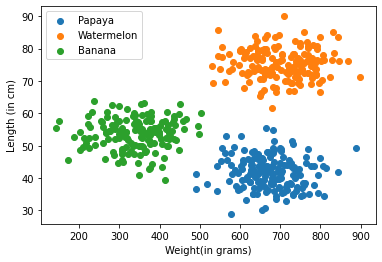

In [2]:
print("*This isn't a real Dataset, it is only made to teach KNN concepts.")
papaya = X[y==0]
watermelons = X[y==1]
banana = X[y==2]
plt.scatter(papaya[:,0],papaya[:,1], label = "Papaya")
plt.scatter(watermelons[:,0],watermelons[:,1], label = "Watermelon")
plt.scatter(banana[:,0],banana[:,1], label = "Banana")
plt.xlabel("Weight(in grams)")
plt.ylabel("Length (in cm)")
plt.legend()
plt.show()

Now as we have plotted the given data, let's see some new points that we have to classify using KNN, lets take 4 new points, A,B,C & D.

A = [[300],[50]]

B = [[700],[40]]

C = [[600],[80]]

D = [[600],[60]]

*This isn't a real Dataset, it is only made to teach KNN concepts.


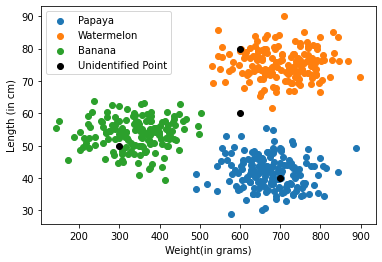

In [3]:
print("*This isn't a real Dataset, it is only made to teach KNN concepts.")
papaya = X[y==0]
watermelons = X[y==1]
banana = X[y==2]
plt.scatter(papaya[:,0],papaya[:,1], label = "Papaya")
plt.scatter(watermelons[:,0],watermelons[:,1], label = "Watermelon")
plt.scatter(banana[:,0],banana[:,1], label = "Banana")

plt.scatter([300],[50], c="black", label = "Unidentified Point")
plt.scatter([700],[40], c="black")
plt.scatter([600],[80], c ="black")
plt.scatter([600],[60], c = "black")
plt.xlabel("Weight(in grams)")
plt.ylabel("Length (in cm)")
plt.legend()
plt.show()

Now before applying any algorithm, just by seeing at the graph we can tell point A(300,50), belongs to Banana, similarly B(700,40) belongs to Papaya and C(600,80) belongs to Watermelon. But can we tell which group should D(600,60) belong to?, and how exactly we were able to tell about A, B & C? 


The answer is simple, we saw that the point A is lying in somewhere middle of the Banana cluster, same for B & C, or in other words we can say that we saw its neighbouring points. And to classify point D, we can use same technique i.e. we can see **some** closest points, and find the max. no. of points belonging to a group, and we can say point D should also belong to that group.


Now what is the value of this **some**?

=> This some is called the parameter **K** in KNN



### Value of K
If we keep value of *K = 1* , it will only consider a single closest point, which will not be fair because there may be existing an outlier(a falsely classified point) nearest to it, means our algorithm will only consider that point and will false classify the new point too. So, we should consider increasing the value of K.


What if we consider all the points? i.e. K=len(X)

It will also be unfair because in this case it will consider all the existing points of the data, and will always classify the new point to the majority class.


By now you must have thought of putting K = len(X)/2, but there's no certainity that this time our model will correctly classify the new point. (Cosider a data where class A has 5 points, and class B has 50 points, it will not perform well.)


So to understand about the value of K, we should first learn about 3 topics -> Training Data, Validation Data & Accuracy.

### Accuracy
Accuracy is defined as the degree to which the result of a measurement conforms to the correct value, or we can say it is a metric that tells us about the accuracy of the model.

### Training & Validation Datasets
To ensure maximum accuracy of a model, we should test it on certain test cases, and match the predicted value to the real true value. So, to achieve this we'll need some data, whose true value are known to us. So, we divide our given data into 2 parts in ratio of 8:2 (can differ depending on data). The 80% of the data is classified as the training dataset, and the rest 20% of the data is classified as validation dataset.



So now, the value of K is measured between 1 and len(X), so that we can achieve maximum accuracy.

## KNN - Code (Classification)
So, as discussed, first let's divide our data into training and Validation Datasets.

In [4]:
train_idxs = np.random.choice(np.arange(0,len(X)), size = int(len(X)*0.8), replace = False)
test_idxs = []
for i in range(0, len(X)):
    if i not in train_idxs:
        test_idxs.append(i)
        
test_idxs = np.array(test_idxs)

X_train = X[train_idxs]
y_train = y[train_idxs]

X_test = X[test_idxs]
y_test = y[test_idxs]

### Plotting the divided data

*This isn't a real Dataset, it is only made to teach KNN concepts.


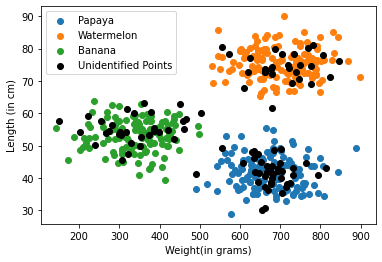

In [5]:
print("*This isn't a real Dataset, it is only made to teach KNN concepts.")

papaya = X_train[y_train==0]
watermelons = X_train[y_train==1]
banana = X_train[y_train==2]

plt.scatter(papaya[:,0],papaya[:,1], label = "Papaya")
plt.scatter(watermelons[:,0],watermelons[:,1], label = "Watermelon")
plt.scatter(banana[:,0],banana[:,1], label = "Banana")
plt.scatter(X_test[:,0], X_test[:,1], c = "black", label = "Unidentified Points")

plt.xlabel("Weight(in grams)")
plt.ylabel("Length (in cm)")
plt.legend()
plt.show()

So now let's start coding KNN

First we'll need a function to calculate the distance between two points, so that we can find the closest ones later on.

In [6]:
def distance(p1,p2):
    d = ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5 #Distance Formula
    return d

> **Note:**
>> The distance Formula $\sqrt[]{(x_2 - x_1)^2+(y_2 - y_1)^2}$, is also known as $L_2-norm$.<br>
Norms are some functions that bring an n-d vector to 1-d constant.<br>
For eg: Sum, Distance, Dot products.<br>
To know more about norms, read https://en.wikipedia.org/wiki/Norm_(mathematics)<br>
and learn about $L_0 , L_1 , L_2 and L_\infty$ norms, which may help you further.<br>

In [7]:
#Now let's make the predict function, which takes a point as input, and returns its predicted class
def predict(p,k):
    distances = []
    for instance in X_train:
        d = distance(p,instance)
        distances.append(d)
        
    distances = np.array(distances)
    top_indexes = np.argsort(distances)[:k]
    k_neighbours = y_train[top_indexes]
    
    unique_classes, counts = np.unique(k_neighbours, return_counts = True)
    predicted_class = unique_classes[counts.argmax()]
    
    confidence = np.max(counts)/np.sum(counts)
    return predicted_class, confidence*100

Now let's take a random value of k as 5, to test our code, and try to predict the classes of A,B,C & D 

A = [[300],[50]]

B = [[700],[40]]

C = [[600],[80]]

D = [[600],[60]]

In [8]:
print(predict([300,50],5)) #A
print(predict([700,40],5)) #B
print(predict([600,80],5)) #C
print(predict([600,60],5)) #D

(2, 100.0)
(0, 100.0)
(1, 100.0)
(0, 60.0)


We can see, we got the correct predictions for A,B & C as well as D(although with 60% probability)
And at this point, we know our code is working properly fine and getting the job done.
So now lets move on, and optimize our code for the value of **K**.



For that we should first define a function for calculating accuracy.

In [9]:
def accuracy(k):
    predictions = []
    for instance in X_test:
        predictions.append(predict(instance,k)[0])
        
    acc = 0
    for i in range(len(predictions)):
        if predictions[i] == y_test[i]:
            acc+=1
            
    acc = (acc/len(predictions))*100
    return acc

Now let's plot a graph between different values of K v/s their accuracy

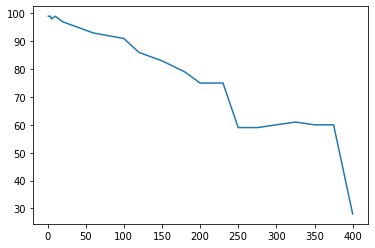

In [10]:
k_list = [1,2,3,4,5,10,15,20,30,50,60,100,120,150,180,200,220,230,250,275,300,325,350,375,400]
accuracies = []

for k in k_list:
    accuracies.append(accuracy(k))
    
plt.plot(k_list,accuracies)
plt.show()

So, we can see for different values of K, we got different accuracies. And we can see for which values of K, we're getting maximum accuracy.

### Hyperparameter :-
Here as we saw, we ourselves have to set the value of **K**, and the whole performance of the model depends on its value. These type of values, that we have to set on our own, and which affects the performance of the model are called **Hyperparameters**.


## Regression by KNN
Now as we've done a classification task, let's see a regression task as well, with the help of an Example too.
Below is a house price dataset, having only single feature of land size. So X contains land size(in sq. feet) of some houses of a locality, and y contains their corresponding prices (in crores).


**X looks like :**

```
[[1599.60448522],
[1793.63237666],
[4588.03138463],
[3621.75315899],
[4343.08060035],... 50 instances]
```


**y looks like:**

```
[2.65917039, 2.27477643, 5.08075256, 3.97100962, 4.61060872,... 50 instances]
```

In [11]:
import numpy as np
import matplotlib.pyplot as plt
X = np.load("./Data/KNN/Regression/X_data.npy")
y = np.load("./Data/KNN/Regression/Y_data.npy")
X.shape, y.shape

((50, 1), (50,))

*This isn't a real Dataset, it is only made to teach KNN concepts.


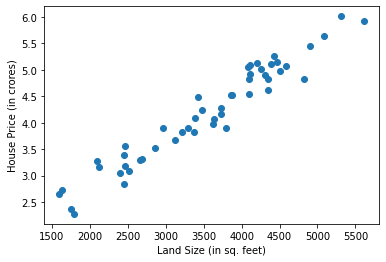

In [12]:
print("*This isn't a real Dataset, it is only made to teach KNN concepts.")

plt.scatter(X,y)
plt.xlabel("Land Size (in sq. feet)")
plt.ylabel("House Price (in crores)")
plt.show()

Now to perform regression by KNN, we follow the same methodology. To predict the price of a new house, we'll conisder the house of prices whose land sizes are very close to the new instance. and then finally we can find out their mean which will be the price of our new house.

## KNN - Code (Regression)
So as done earlier, let's first split our data to training and validation datasets.

### Splitting the Data

In [13]:
train_idxs = np.random.choice(np.arange(0,len(X)), size = int(len(X)*0.8), replace = False)
test_idxs = np.array([i for i in range(0, len(X)) if i not in train_idxs])

X_train = X[train_idxs]
y_train = y[train_idxs]

X_test = X[test_idxs]
y_test = y[test_idxs]

### Plotting the Divided Data

*This isn't a real Dataset, it is only made to teach KNN concepts.


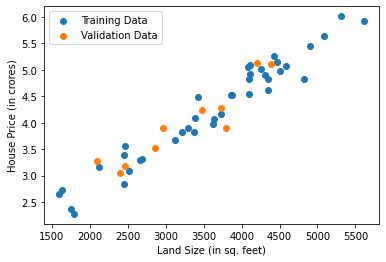

In [14]:
print("*This isn't a real Dataset, it is only made to teach KNN concepts.")

plt.scatter(X_train,y_train, label="Training Data")
plt.scatter(X_test, y_test, label = "Validation Data")

plt.xlabel("Land Size (in sq. feet)")
plt.ylabel("House Price (in crores)")

plt.legend()
plt.show()

In [15]:
def distance(p1,p2):
    return abs(p2-p1) # return absolute value

def predict(point, k):
    distances = []
    for instance in X_train:
        distances.append(distance(instance[0], point))
        
    distances = np.array(distances)
    top_indexes = np.argsort(distances)[:k]
    y_pred = y_train[top_indexes].mean()
    return y_pred ,top_indexes

In [16]:
land_size = 3000
prediction, closest_points = predict(land_size,5)
print(prediction)

3.597148662984181


#### Plotting the prediction and the closest points that helped in making the prediction

*This isn't a real Dataset, it is only made to teach KNN concepts.


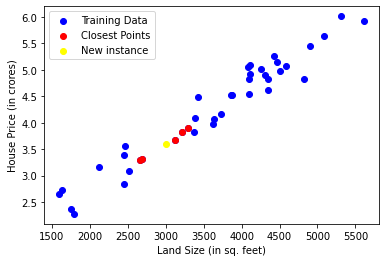

In [17]:
print("*This isn't a real Dataset, it is only made to teach KNN concepts.")

plt.scatter(X_train,y_train, label="Training Data", c = "blue")
plt.scatter(X_train[closest_points] ,y_train[closest_points], c ="red", label="Closest Points")
plt.scatter(land_size, prediction, c = "yellow", label = "New instance")

plt.xlabel("Land Size (in sq. feet)")
plt.ylabel("House Price (in crores)")

plt.legend()
plt.show()

As done earlier, we can make an accuracy function and then plot the graph of K v/s accuracy, and instead of using randomly k = 5, we can get the value of K, that gives us the maximum accuracy.

*You should try it on your own, as it can be a good practice problem.

Now as we can see, a line can be fitted in this data, to get a good prediction, so let's try to plot a line using this data.

In [18]:
predictions = []
for house in np.arange(1000,6500):
    prediction = predict(house, 5)[0]
    predictions.append(prediction)

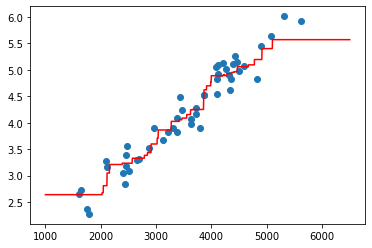

In [19]:
plt.scatter(X,y)
plt.plot(np.arange(1000,6500), predictions, c = "red")
plt.show()

As we can see, it is approximating a very good curve, but it would be better if this curve could be a straight line because :
* For a very small about of change in land size, there should be a increase/decrease in the price, but as we can see, in some areas, this isn't the case.
* Another problem is when we're trying to predict a price of land size less than 1500, or more than 5000, it is giving us the constant price, because our data is limited to this area.

## Limitations of KNN
* It is totally dependent on data, as everytime we need to predict even a single point, it will require the whole dataset.
* As we need the entire data everytime, it takes up a lot of memory.
* Our whole algorithm is dependent on a single parameter **K**




But despite these limitations, KNN is a very good and easy algorithm and it is even used in today's technologies. Like our Face Recognition system in our phones uses KNN at some level.

## Further Readings
- https://en.wikipedia.org/wiki/Norm_(mathematics)